# K-means: clusterization with iris dataset
This module consist in using the iris dataset to cluster the different species of flowers according to their characteristics. Using the unsupervised K-means algorithm.

In [55]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


In [32]:
iris = datasets.load_iris()  #cargamos el dataset

In [33]:
X_iris = iris.data
Y_iris = iris.target

In [34]:
x = pd.DataFrame(iris.data, columns=['Sepal Length','Speal Width','Petal Length','Petal Width'])
y = pd.DataFrame(iris.target,columns=['Target'])


Text(0, 0.5, 'Petal Width')

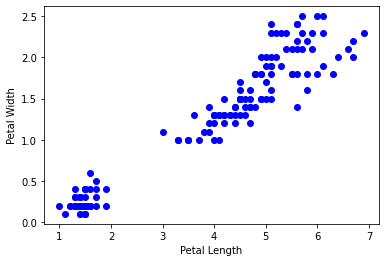

In [35]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize =10)

#### Model training

In [36]:
model = KMeans(n_clusters=3, max_iter=1000)   #aqui dividimos en dos cluster por que eso muestra la imagen
model.fit(x)
y_labels = model.labels_


In [37]:
y_kmeans = model.predict(x)
print('Prediction ', y_kmeans)

Prediction  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [38]:
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)


0.7302382722834697


## Elbow method to determine k
Inertia measures how well a dataset was clustered by K-Means. A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases. To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.


Number of centroids: 1 ---  Accuracy: 0.0
Number of centroids: 2 ---  Accuracy: 0.5399
Number of centroids: 3 ---  Accuracy: 0.7302
Number of centroids: 4 ---  Accuracy: 0.6498
Number of centroids: 5 ---  Accuracy: 0.6155
Number of centroids: 6 ---  Accuracy: 0.4475
Number of centroids: 7 ---  Accuracy: 0.482
Number of centroids: 8 ---  Accuracy: 0.4496
Number of centroids: 9 ---  Accuracy: 0.4288
Number of centroids: 10 ---  Accuracy: 0.3872


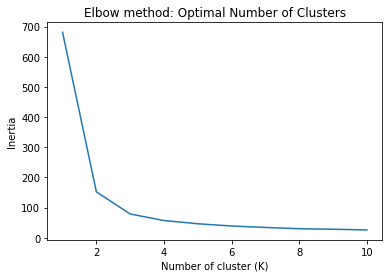

It is recommend to use a 3 centroids, to ensure an accuracy of 0.7302


In [39]:
def elbow_k(x, target):
    wcss =[]
    n = 1
    acc =0.5
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
        kmeans.fit(x)
        y_means = kmeans.predict(x)
        wcss.append(kmeans.inertia_)
        accuracy = round(metrics.adjusted_rand_score(target, y_means),4)
        print(f'Number of centroids: {i} ---  Accuracy: {accuracy}')
        if accuracy > acc:
            acc = accuracy
            n = i
    plt.plot(range(1,11),wcss)
    plt.title('Elbow method: Optimal Number of Clusters')
    plt.xlabel('Number of cluster (K)')
    plt.ylabel('Inertia')
    plt.show()
    print(f"It is recommend to use a {n} centroids, to ensure an accuracy of {acc}")

elbow_k(x,Y_iris)


Text(0, 0.5, 'Inertia')

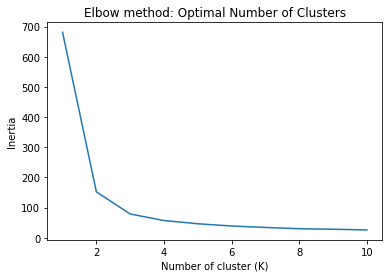

In [40]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method: Optimal Number of Clusters')
plt.xlabel('Number of cluster (K)')
plt.ylabel('Inertia')

#### Visualization of the model

Text(0, 0.5, 'Petal Width (cm)')

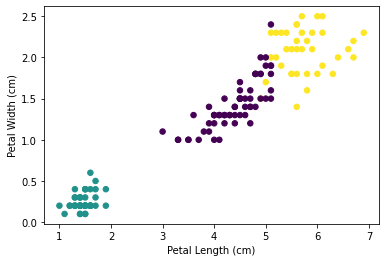

In [41]:
plt.scatter(x['Petal Length'], x['Petal Width'], c=y_kmeans,s=30)
plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Petal Width (cm)', fontsize = 10)

# Challenge: Wines dataset
For this problem it is neccesary to do the standarization of the data in order to have high accuracy in the trainig.

In [42]:
wines = datasets.load_wine()
wines

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [43]:
X_wines = wines.data
Y_wines = wines.target


In [44]:
##standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_wines)
x_scaled = scaler.transform(X_wines)

In [45]:
x = pd.DataFrame(x_scaled, columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
                                     'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                                     'proanthocyanins', 'color_intensity', 'hue',
                                     'od280/od315_of_diluted_wines', 'proline'])
y = pd.DataFrame(Y_wines, columns=['target'])

Number of centroids: 1 ---  Accuracy: 0.0
Number of centroids: 2 ---  Accuracy: 0.3887
Number of centroids: 3 ---  Accuracy: 0.9149
Number of centroids: 4 ---  Accuracy: 0.7492
Number of centroids: 5 ---  Accuracy: 0.6372
Number of centroids: 6 ---  Accuracy: 0.6842
Number of centroids: 7 ---  Accuracy: 0.554
Number of centroids: 8 ---  Accuracy: 0.3955
Number of centroids: 9 ---  Accuracy: 0.427
Number of centroids: 10 ---  Accuracy: 0.3752


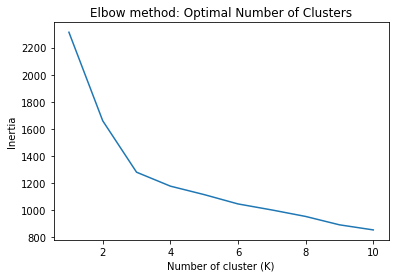

It is recommend to use a 3 centroids, to ensure an accuracy of 0.9149


In [47]:
#To select the number of centroids
elbow_k(x, Y_wines)

#### Model training

In [52]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x)
y_labels = model.labels_
y_kmeans = model.predict(x)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])
y_kmeans_df.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [53]:
accuracy =  metrics.adjusted_rand_score(Y_wines, y_kmeans)
print(round(accuracy, 5))

0.89749


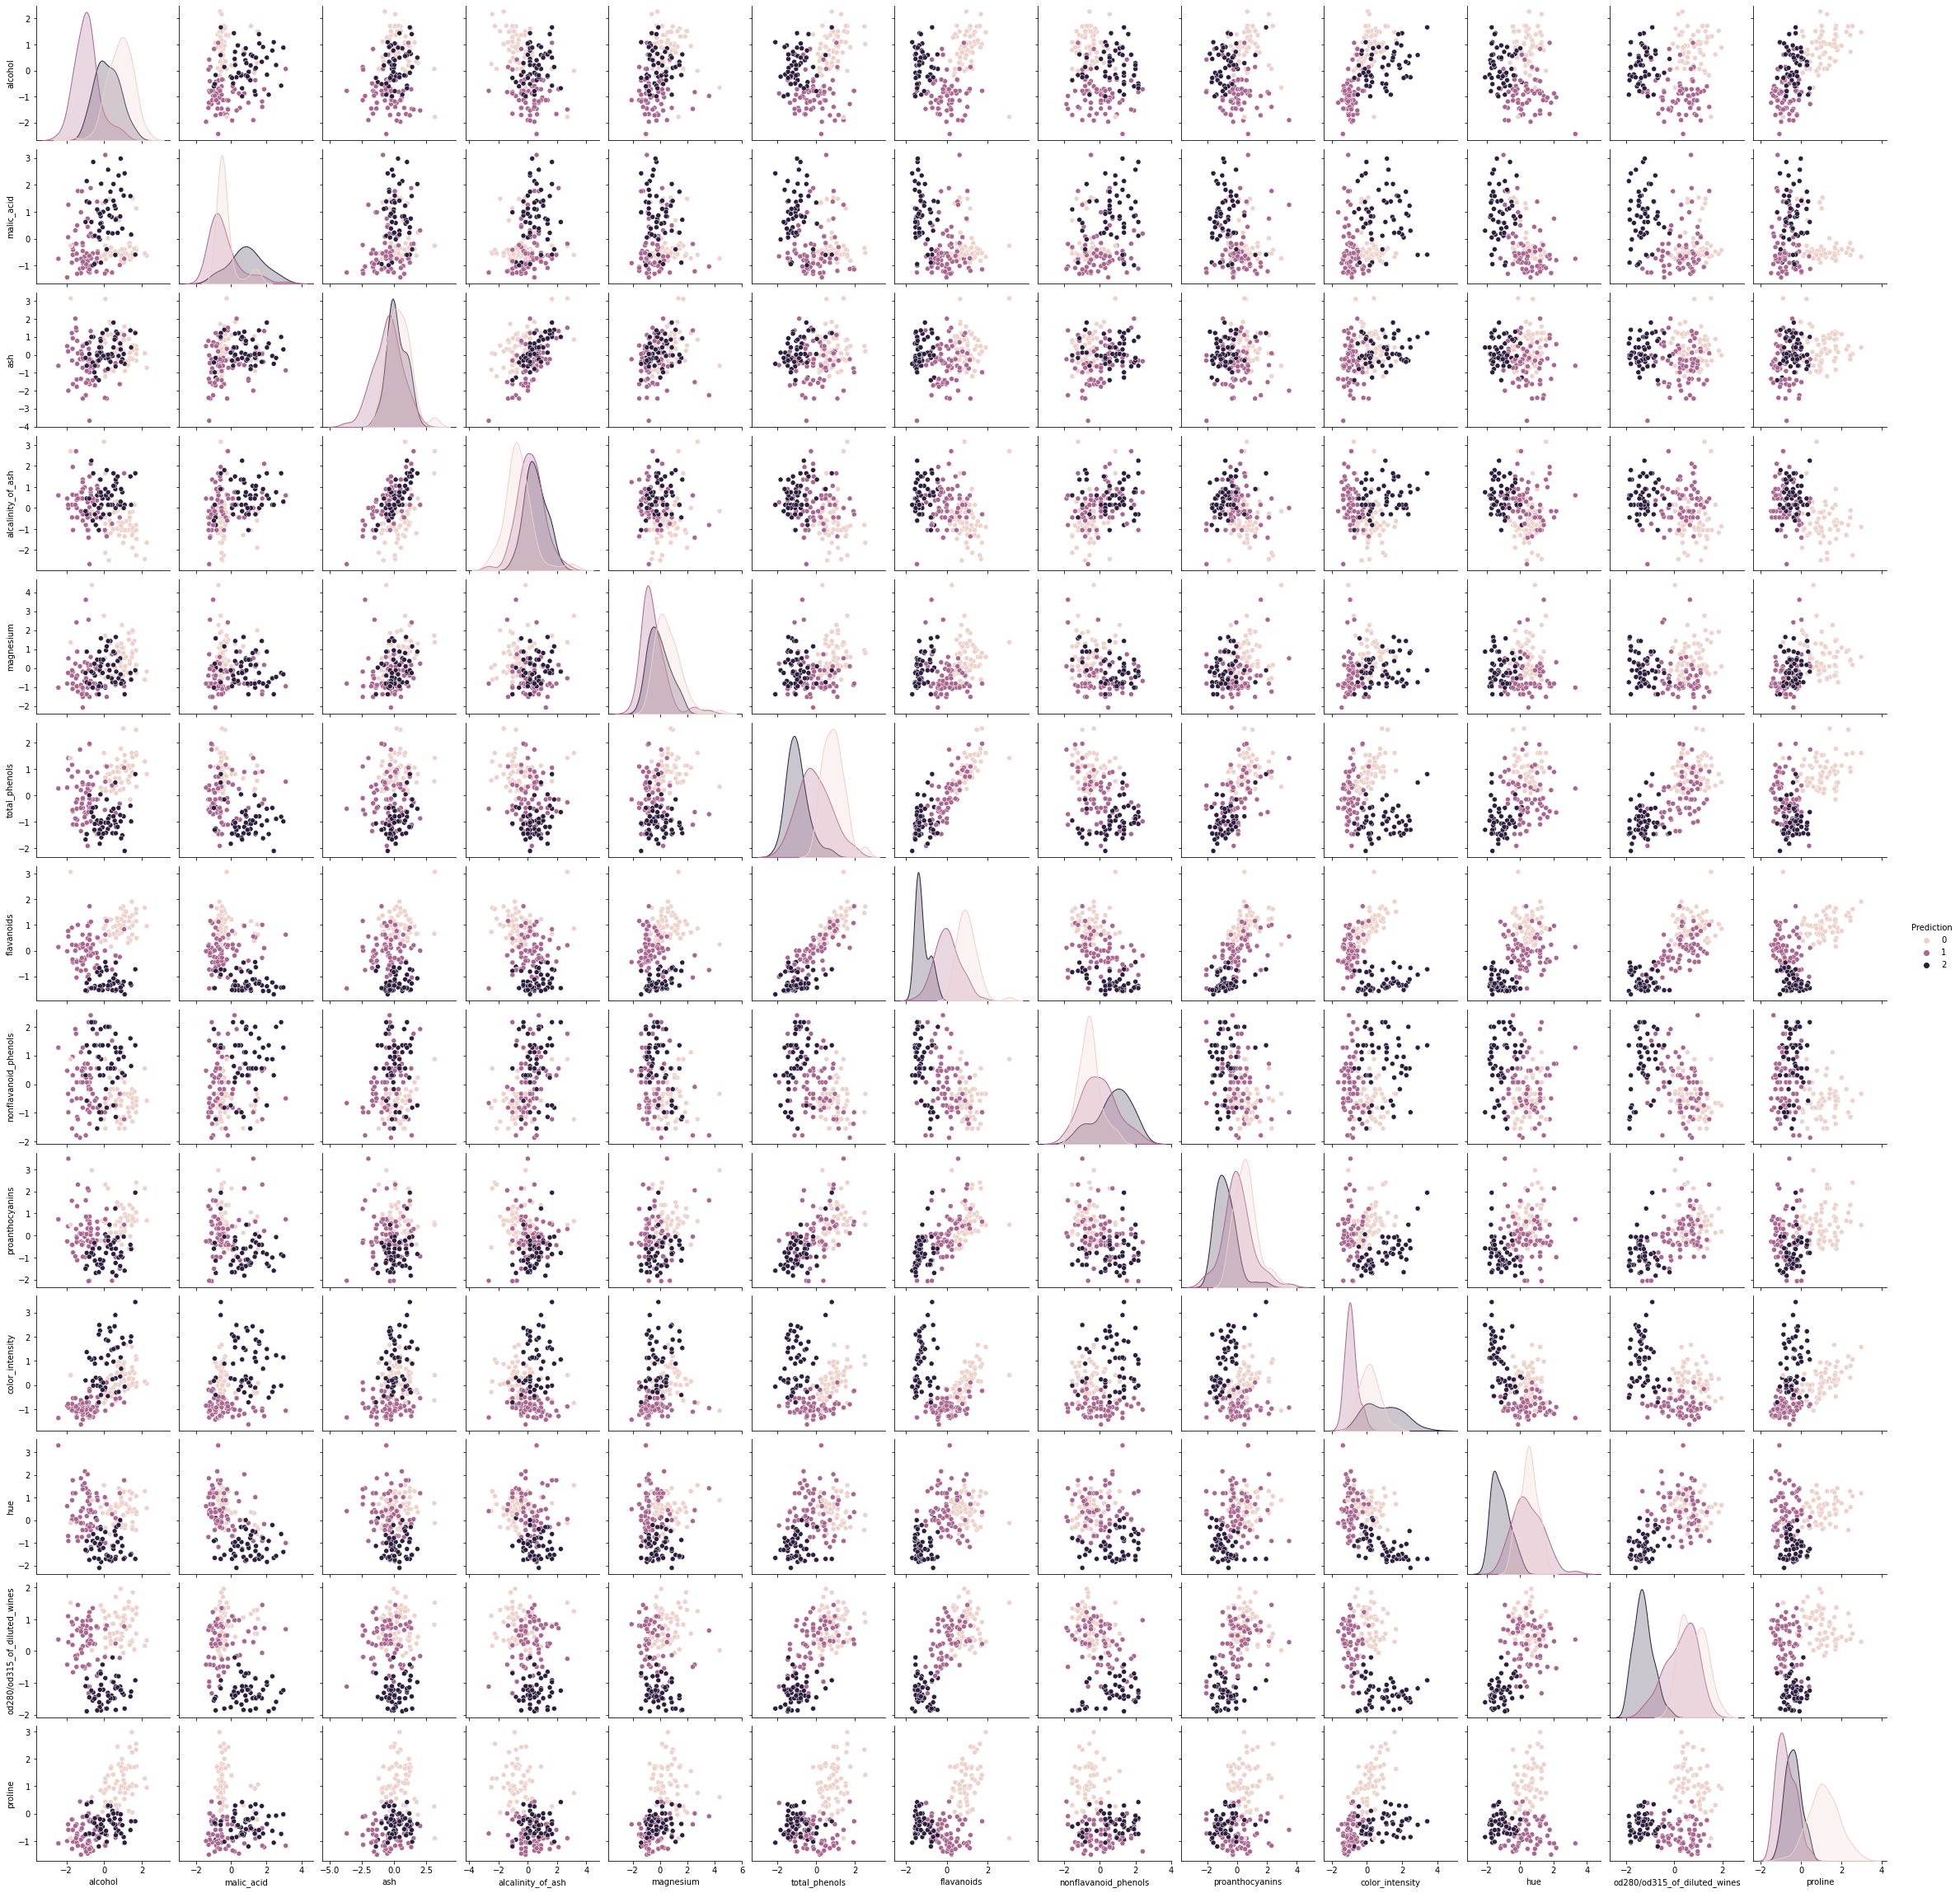

In [56]:
# Visualization
Z = pd.concat([x, y_kmeans_df], axis = 1)
# Grafico
sns.pairplot(Z, hue = 'Prediction')